In [1]:
import os
import torch
import pandas as pd
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

# import torchvision.transforms.functional
# import torchvision.transforms.functional as F

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn

from torchinfo import summary
from tqdm import tqdm

# Planet : Amazon space -- Full model running for multilabel classification

!! This is supposed to become the main jupyternotebook to run the multilabel classification and testing !!

Usefull links:
<https://learnopencv.com/multi-label-image-classification-with-pytorch-image-tagging/>

## 0) Initialization
### 0.1) Getting Module and Functions

In [2]:
from Multilabel_Amazon_Engine import checking_folder, train, show_4_image_in_batch, batch_prediction
from Multilabel_Amazon_Module import AmazonSpaces, MultiLayerCNN, AdjustSaturation

In [3]:
data_folder = '../IPEO_Planet_project'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, "+str(data_folder)

## 1) Putting the model on the gpu

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [5]:
model = MultiLayerCNN().to(device)

### + Load previously trained model

In [6]:
if device=="cpu":
    model.load_state_dict(torch.load('model_multilabel_classification.pth', map_location=torch.device('cpu')))
else:
    model.load_state_dict(torch.load('model_multilabel_classification.pth'))

In [6]:
model.eval()

MultiLayerCNN(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool_max): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool_avg): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (fc): Linear(in_features=14580, out_features=17, bias=True)
  (batchNorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (loss): BCELoss()
  (sig): Sigmoid()
)

## 2) Getting the different datasets

In [7]:
train_csv = 'training.csv'
validation_csv = 'validation.csv'
test_csv = 'test.csv'

In [8]:
#Transform_choice = transforms.Compose([transforms.ToTensor(), transforms.CenterCrop(256),transforms.RandomAutocontrast(p=1), AdjustSaturation(1.2)])
Transform_choice = transforms.Compose([transforms.ToTensor(), transforms.CenterCrop(256)])

In [9]:
train_dataset = AmazonSpaces(csv_file=train_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)
validation_dataset = AmazonSpaces(csv_file=validation_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)
test_dataset = AmazonSpaces(csv_file=test_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)

## 3) Wrapping into the different dataloaders

In [12]:
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last = True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True, drop_last = True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True)

## 4) Choice of Criterion and Opitimizer

In [13]:
learning_rate = 0.01

criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 5) TRAINING

Training epoch 0 ..... 
Training


0it [00:00, ?it/s]

image batch size: torch.Size([128, 3, 256, 256])
 Predicted shape: (128, 17) and ground truth shape (128, 17)
{'micro/precision': 0.14269141531322505, 'micro/recall': 0.32887700534759357, 'micro/f1': 0.1990291262135922, 'macro/precision': 0.13234299735937155, 'macro/recall': 0.23652876144883817, 'macro/f1': 0.10123169249857308, 'samples/precision': 0.14224330357142856, 'samples/recall': 0.3319010416666667, 'samples/f1': 0.19285185300810304, 'hamming_loss': 0.45496323529411764, 'total_loss': 0.6883842038403278}
iter:  0 training:micro f1: 0.199macro f1: 0.101 samples f1: 0.193
Predicted:
[[0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.]]
Ground-truth
[[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 0. 

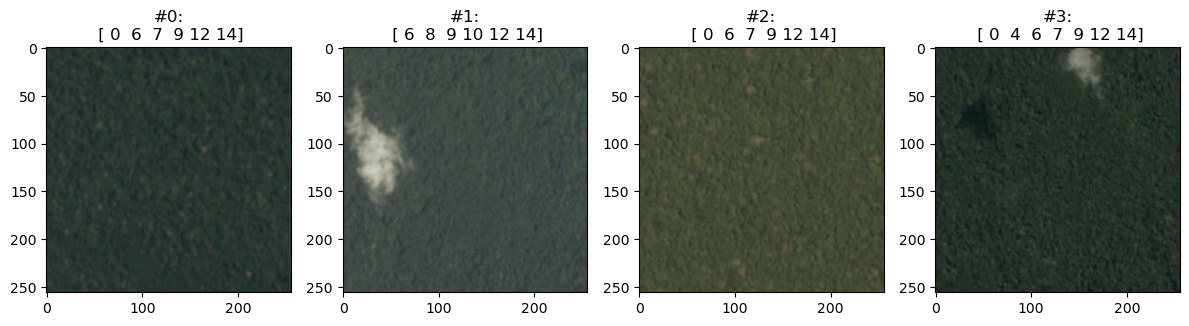

21it [00:25,  1.10it/s]

iter: 20 training:micro f1: 0.705macro f1: 0.106 samples f1: 0.711


41it [00:43,  1.09it/s]

iter: 40 training:micro f1: 0.647macro f1: 0.103 samples f1: 0.664


60it [01:00,  1.14it/s]

iter: 60 training:micro f1: 0.637macro f1: 0.105 samples f1: 0.662


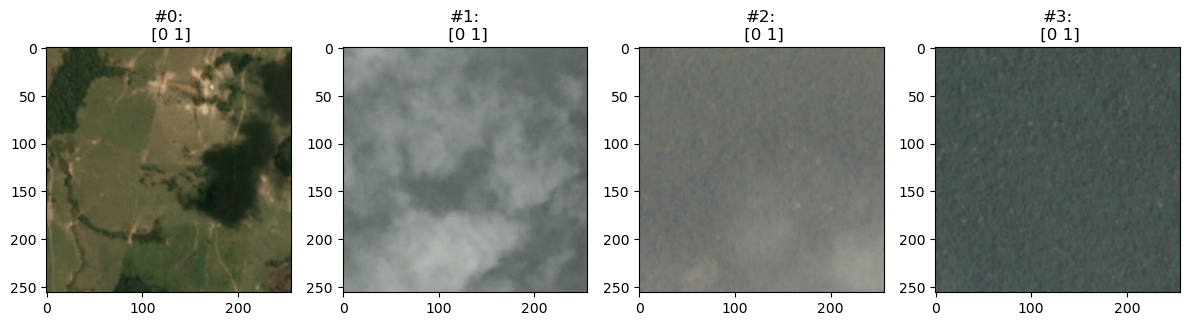

81it [01:23,  1.05s/it]

iter: 80 training:micro f1: 0.665macro f1: 0.105 samples f1: 0.683


101it [01:43,  1.01it/s]

iter:100 training:micro f1: 0.696macro f1: 0.108 samples f1: 0.716


120it [02:01,  1.13it/s]

iter:120 training:micro f1: 0.681macro f1: 0.104 samples f1: 0.696


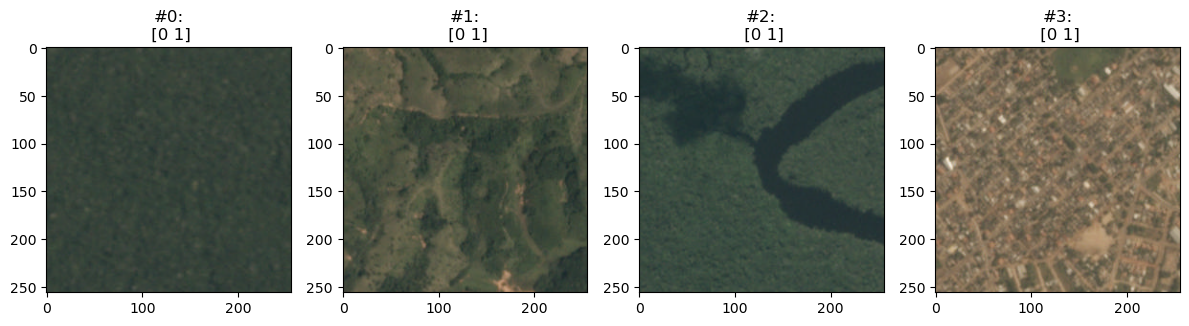

141it [02:21,  1.09it/s]

iter:140 training:micro f1: 0.660macro f1: 0.103 samples f1: 0.664


161it [02:40,  1.06it/s]

iter:160 training:micro f1: 0.678macro f1: 0.106 samples f1: 0.708


180it [02:58,  1.04it/s]

iter:180 training:micro f1: 0.669macro f1: 0.105 samples f1: 0.684


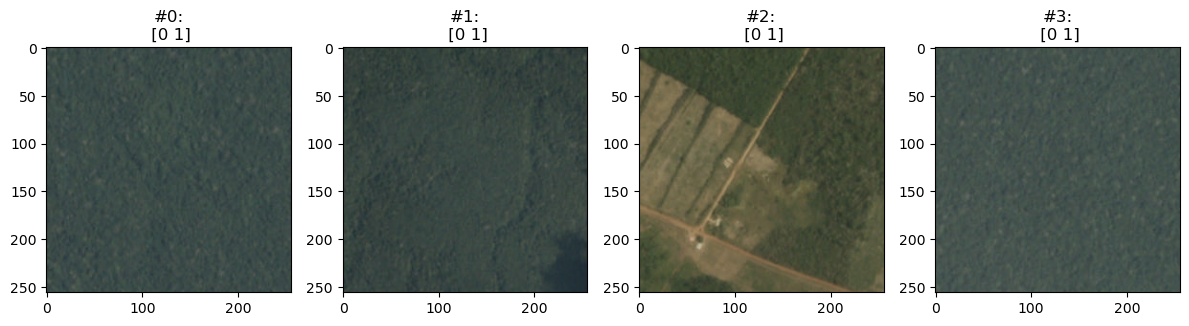

187it [03:05,  1.01it/s]


Validating


62it [00:53,  1.15it/s]


Training epoch 1 ..... 
Training


0it [00:00, ?it/s]

image batch size: torch.Size([128, 3, 256, 256])
 Predicted shape: (128, 17) and ground truth shape (128, 17)
{'micro/precision': 0.8125, 'micro/recall': 0.5942857142857143, 'micro/f1': 0.6864686468646864, 'macro/precision': 0.09558823529411764, 'macro/recall': 0.11764705882352941, 'macro/f1': 0.10477587504601168, 'samples/precision': 0.8125, 'samples/recall': 0.6450520833333333, 'samples/f1': 0.7004092261904762, 'hamming_loss': 0.08731617647058823, 'total_loss': 0.3335919762304162}
iter:  0 training:micro f1: 0.686macro f1: 0.105 samples f1: 0.700
Predicted:
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Ground-truth
[[[1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

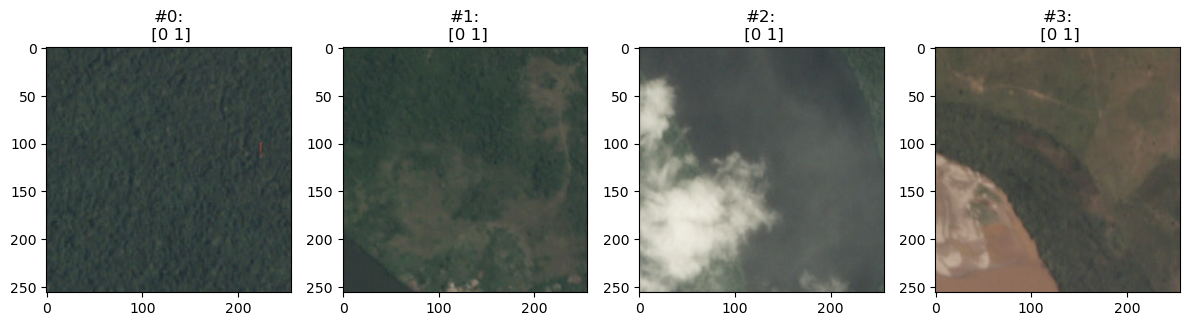

21it [00:19,  1.16it/s]

iter: 20 training:micro f1: 0.690macro f1: 0.106 samples f1: 0.703


41it [00:36,  1.15it/s]

iter: 40 training:micro f1: 0.672macro f1: 0.107 samples f1: 0.694


60it [00:53,  1.16it/s]

iter: 60 training:micro f1: 0.669macro f1: 0.103 samples f1: 0.676


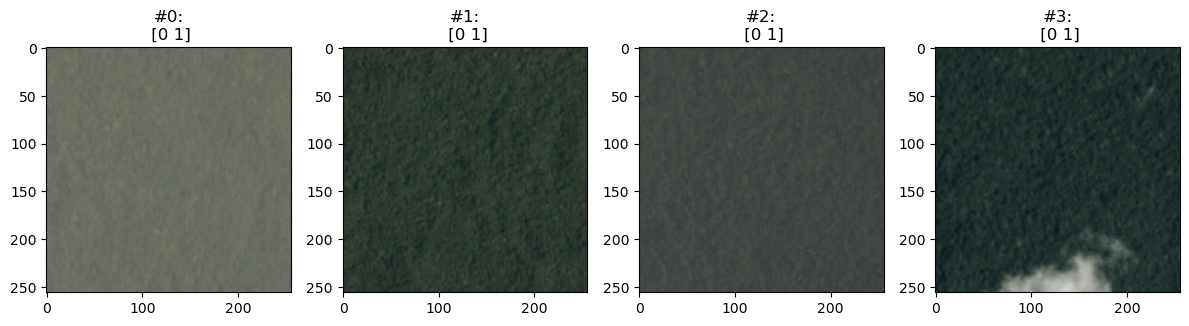

81it [01:13,  1.17it/s]

iter: 80 training:micro f1: 0.688macro f1: 0.108 samples f1: 0.710


101it [01:30,  1.16it/s]

iter:100 training:micro f1: 0.712macro f1: 0.108 samples f1: 0.723


120it [01:46,  1.16it/s]

iter:120 training:micro f1: 0.673macro f1: 0.102 samples f1: 0.686


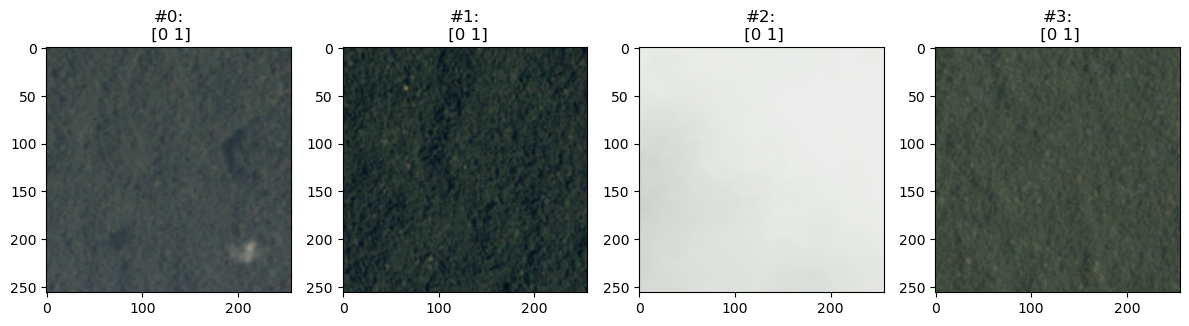

141it [02:05,  1.17it/s]

iter:140 training:micro f1: 0.637macro f1: 0.104 samples f1: 0.654


161it [02:23,  1.07it/s]

iter:160 training:micro f1: 0.718macro f1: 0.109 samples f1: 0.731


180it [02:39,  1.16it/s]

iter:180 training:micro f1: 0.659macro f1: 0.105 samples f1: 0.688


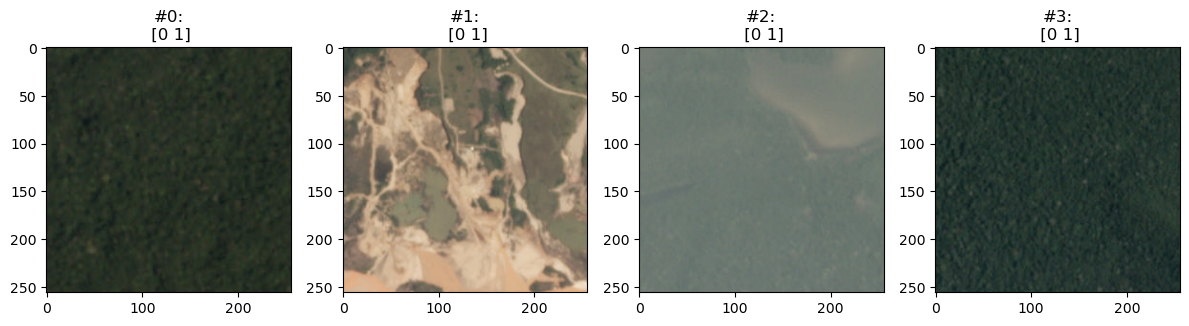

187it [02:47,  1.12it/s]


Validating


62it [00:47,  1.30it/s]


Training epoch 2 ..... 
Training


0it [00:00, ?it/s]

image batch size: torch.Size([128, 3, 256, 256])
 Predicted shape: (128, 17) and ground truth shape (128, 17)
{'micro/precision': 0.84375, 'micro/recall': 0.5966850828729282, 'micro/f1': 0.6990291262135921, 'macro/precision': 0.09926470588235294, 'macro/recall': 0.11764705882352941, 'macro/f1': 0.10715933179711286, 'samples/precision': 0.84375, 'samples/recall': 0.6679873511904761, 'samples/f1': 0.7255332341269842, 'hamming_loss': 0.08547794117647059, 'total_loss': 0.26795975472230243}
iter:  0 training:micro f1: 0.699macro f1: 0.107 samples f1: 0.726
Predicted:
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Ground-truth
[[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0

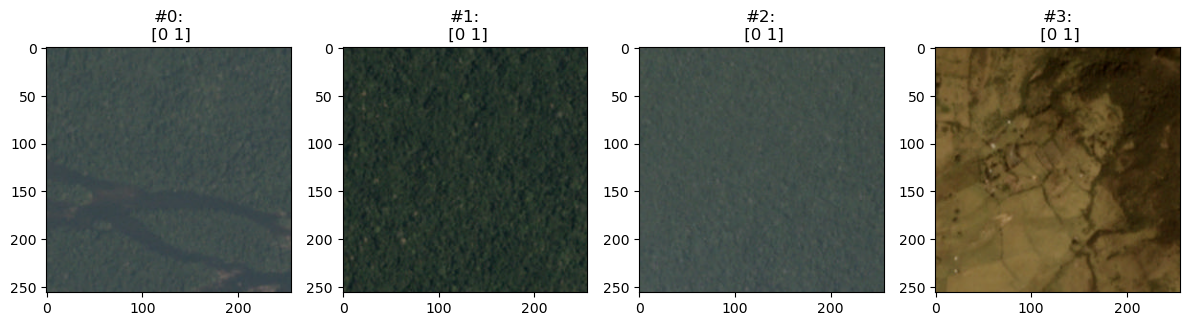

21it [00:18,  1.17it/s]

iter: 20 training:micro f1: 0.686macro f1: 0.106 samples f1: 0.704


41it [00:36,  1.17it/s]

iter: 40 training:micro f1: 0.650macro f1: 0.103 samples f1: 0.662


60it [00:52,  1.15it/s]

iter: 60 training:micro f1: 0.659macro f1: 0.104 samples f1: 0.665


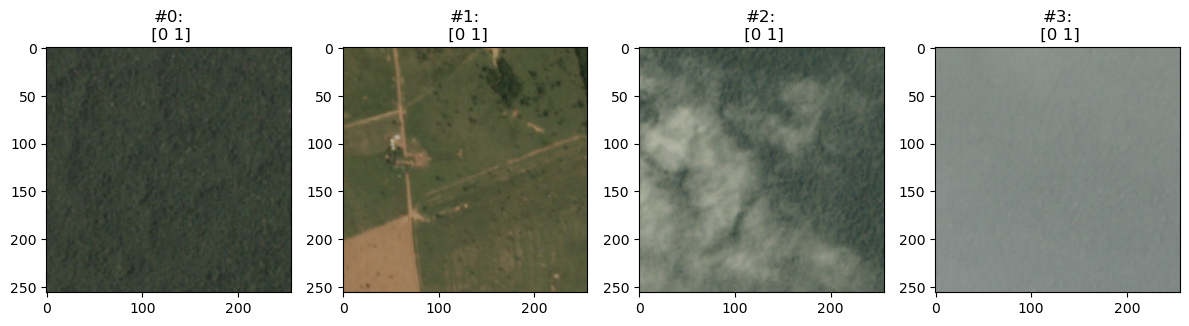

81it [01:12,  1.04it/s]

iter: 80 training:micro f1: 0.691macro f1: 0.106 samples f1: 0.696


101it [01:31,  1.05it/s]

iter:100 training:micro f1: 0.655macro f1: 0.104 samples f1: 0.673


120it [01:48,  1.17it/s]

iter:120 training:micro f1: 0.691macro f1: 0.105 samples f1: 0.699


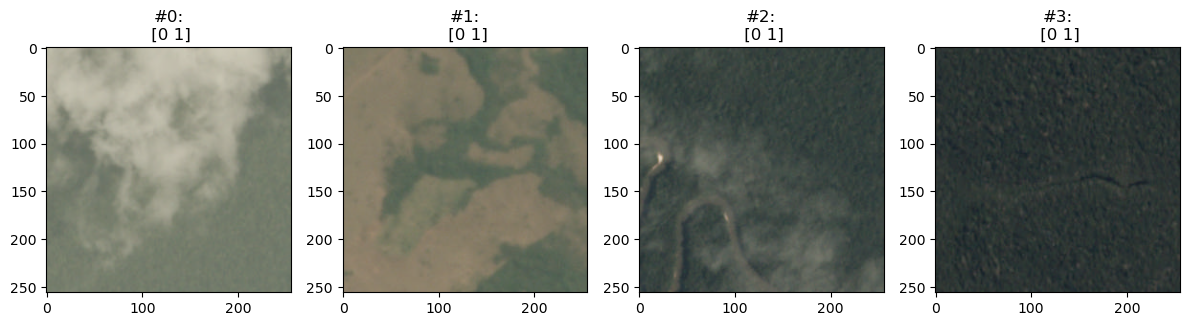

141it [02:09,  1.16it/s]

iter:140 training:micro f1: 0.649macro f1: 0.105 samples f1: 0.672


161it [02:27,  1.12it/s]

iter:160 training:micro f1: 0.683macro f1: 0.108 samples f1: 0.714


180it [02:43,  1.17it/s]

iter:180 training:micro f1: 0.720macro f1: 0.108 samples f1: 0.745


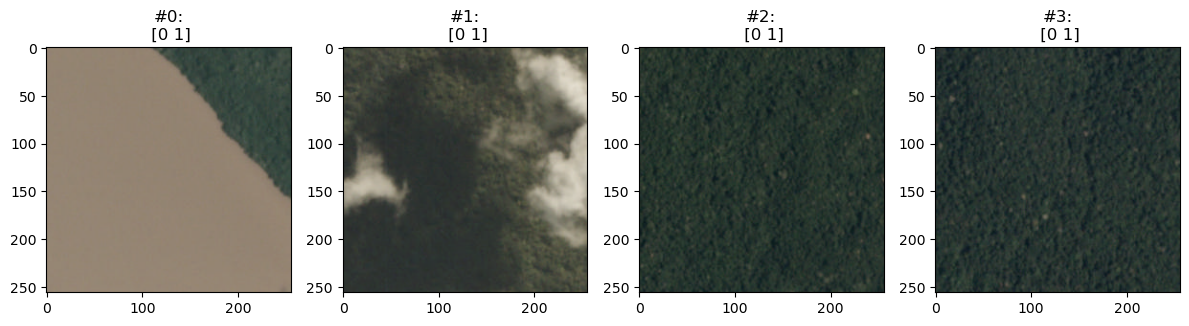

187it [02:50,  1.09it/s]


Validating


62it [00:47,  1.32it/s]


Training epoch 3 ..... 
Training


0it [00:00, ?it/s]

image batch size: torch.Size([128, 3, 256, 256])
 Predicted shape: (128, 17) and ground truth shape (128, 17)
{'micro/precision': 0.83984375, 'micro/recall': 0.5672823218997362, 'micro/f1': 0.6771653543307086, 'macro/precision': 0.09880514705882353, 'macro/recall': 0.11764705882352941, 'macro/f1': 0.10691935054564813, 'samples/precision': 0.83984375, 'samples/recall': 0.631640625, 'samples/f1': 0.70078125, 'hamming_loss': 0.09420955882352941, 'total_loss': 0.2633114466443658}
iter:  0 training:micro f1: 0.677macro f1: 0.107 samples f1: 0.701
Predicted:
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Ground-truth
[[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.

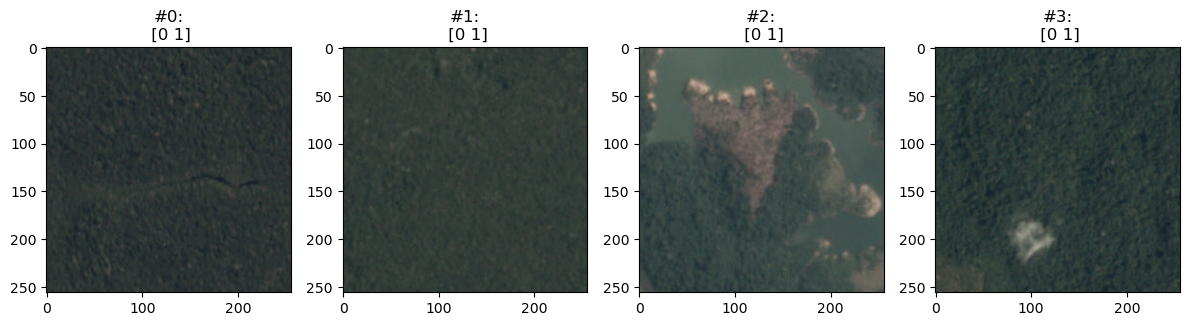

21it [00:19,  1.15it/s]

iter: 20 training:micro f1: 0.683macro f1: 0.107 samples f1: 0.701


41it [00:36,  1.16it/s]

iter: 40 training:micro f1: 0.669macro f1: 0.107 samples f1: 0.690


60it [00:53,  1.11it/s]

iter: 60 training:micro f1: 0.694macro f1: 0.105 samples f1: 0.714


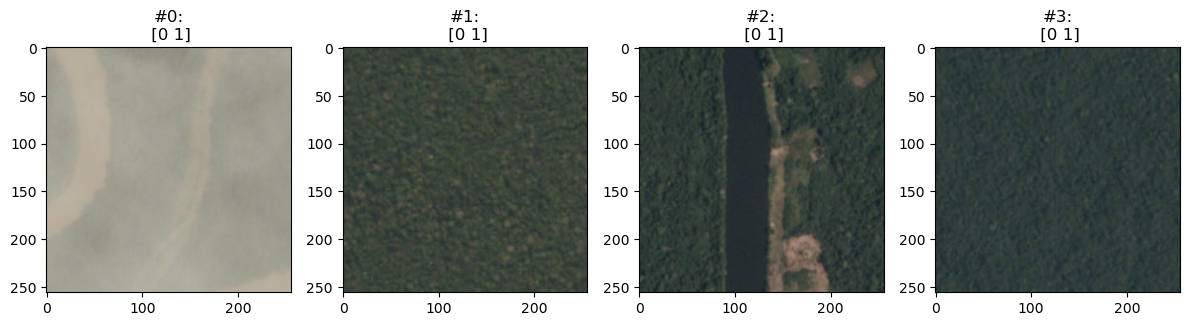

81it [01:13,  1.14it/s]

iter: 80 training:micro f1: 0.698macro f1: 0.106 samples f1: 0.719


101it [01:30,  1.17it/s]

iter:100 training:micro f1: 0.647macro f1: 0.104 samples f1: 0.662


120it [01:46,  1.10it/s]

iter:120 training:micro f1: 0.623macro f1: 0.102 samples f1: 0.638


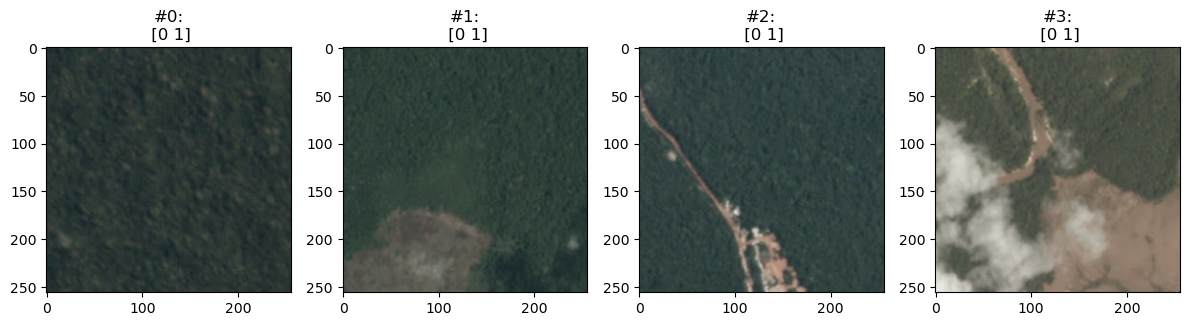

141it [02:05,  1.16it/s]

iter:140 training:micro f1: 0.664macro f1: 0.103 samples f1: 0.670


161it [02:23,  1.16it/s]

iter:160 training:micro f1: 0.691macro f1: 0.107 samples f1: 0.703


180it [02:40,  1.19it/s]

iter:180 training:micro f1: 0.671macro f1: 0.105 samples f1: 0.696


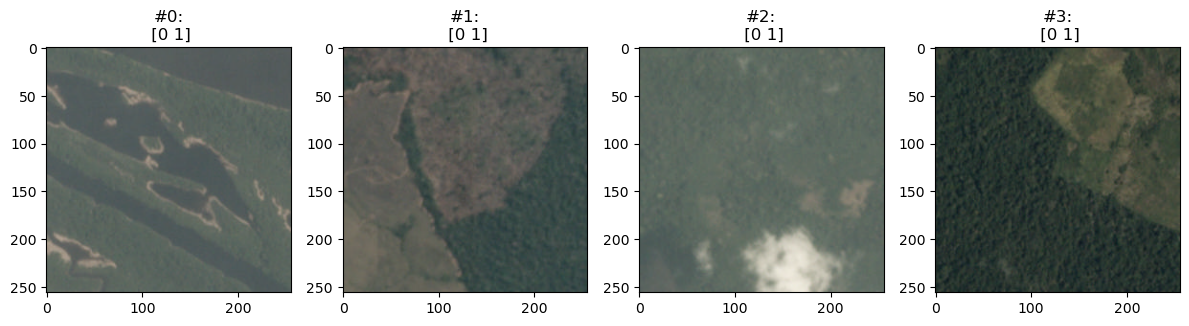

187it [02:47,  1.12it/s]


Validating


62it [00:48,  1.27it/s]

.... ENDED TRAINING THE MODEL !


In [14]:
epochs_number = 4

The_results = train(model, train_dataloader, validation_dataloader, device=device, optimizer= optim, lr = learning_rate, epochs=epochs_number, loss_fn=criterion)

## 5b) Saving the results into a Json file

In [15]:
import json

# create json object from dictionary
js = json.dumps(The_results)

# open file for writing, "w"
name = f"training_results_{epochs_number}epochs_{batch_size}batchsize_{learning_rate}lr_{criterion}_{str(optim).split()[0]}optim.json"
f = open(name,"a")

# write json object to file
f.write(js)

# close file
f.close()

## 5c) Plotting the training phases metrics

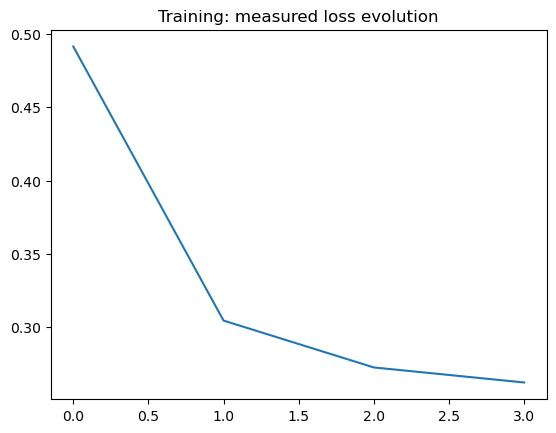

In [16]:
plt.figure()
plt.plot(np.array(The_results['training']['total_loss']))
plt.title('Training: measured loss evolution')
plt.show()

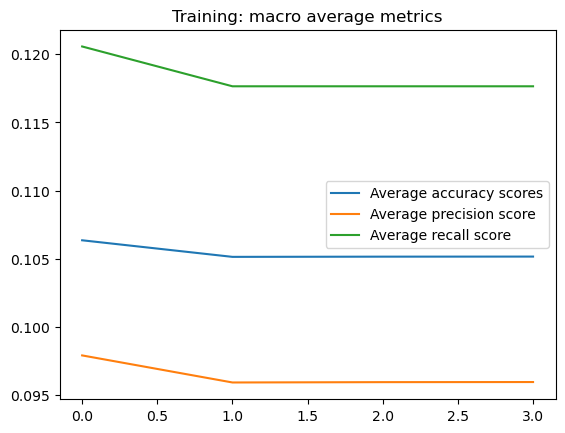

In [17]:
plt.figure()
plt.plot(The_results['training']['macro/f1'])
plt.plot(The_results['training']['macro/precision'])
plt.plot(The_results['training']['macro/recall'])
plt.legend(['Average accuracy scores', 'Average precision score', 'Average recall score'])
plt.title('Training: macro average metrics')
plt.show()

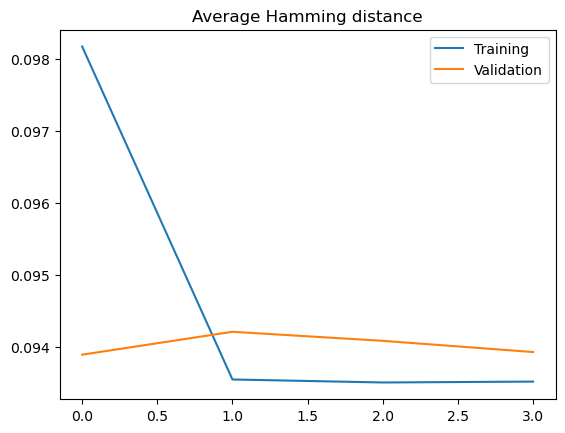

In [18]:
plt.figure()
plt.plot(np.array(The_results['training']['hamming_loss']), label='Training')
plt.plot(np.array(The_results['validating']['hamming_loss']), label='Validation')
plt.legend()
plt.title('Average Hamming distance')
plt.show()

## 6) TESTING

In [42]:
# store stats
losses, accuracies = [], []
count = 0
for batch in tqdm(test_dataloader):
    # TODO run prediction_step
    loss, accuracy, predictions = batch_prediction(batch, model, device = 'cuda')

    # append to stats
    losses.append(loss)
    accuracies.append(accuracy)
    if count == 0:
        all_pred = predictions
        count = 1
    else :
        all_pred = np.vstack((all_pred,predictions))
# average val losses and accuracies over batches
losses, accuracies = np.stack(losses).mean(), np.stack(accuracies).mean()
print(f"valloss {losses:.2f}, val accuracy {accuracies*100:.2f}%")

100%|██████████| 65/65 [02:18<00:00,  2.13s/it]

valloss 0.27, val accuracy 90.25


In [36]:
all_pred

array([[0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       ...,
       [0.3828125, 0.8359375, 0.75     , ..., 0.984375 , 0.90625  ,
        0.9375   ],
       [0.3984375, 0.84375  , 0.75     , ..., 0.953125 , 0.859375 ,
        0.9296875],
       [0.3984375, 0.84375  , 0.7265625, ..., 0.9140625, 0.8984375,
        0.8125   ]])

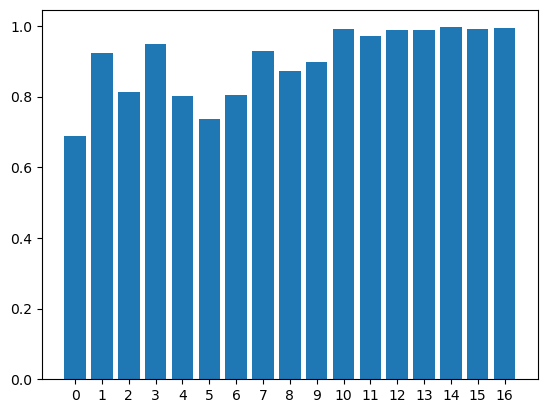

In [45]:
mean_pred = np.stack(all_pred, axis = 0).mean(axis=0)
plt.figure()
plt.bar(x = range(17), height=mean_pred)
plt.xticks(range(17))
plt.title("Accuracy of each class")
plt.show()

# Saving Models

In [46]:
torch.save(model.state_dict(), "model_multilabel_classification.pth")
print("Saved PyTorch Model State to model_multilabel_classification.pth")

Saved PyTorch Model State to model_multilabel_classification.pth
